# Modeling diffusion with coin flips

This exercise was generated from a Jupyter notebook. You can download the notebook [here](diffusion_via_coin_flips.ipynb).
___

In this tutorial we model the process of diffusion using randomly generated unbiased coin flips and discuss the main features of diffusive motion. Diffusion can be understood as a random motion in space caused by thermal fluctuations in the environment. In the cytoplasm of the cell different molecules undergo a 3-dimensional diffusive motion. On the other hand, diffusion on the cell membrane is chiefly 2-dimensional. Here we will consider a 1-dimensional diffusion motion to make the treatment simpler, but the ideas can be extended into higher dimensions.

We will model diffusion as a series of random steps at discrete moments either in position or in negative directions. Starting from the origin of the *x*-coordinate, we will generate multiple random trajectories and look at their average behavior.

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

# Show figures in the notebook
%matplotlib inline

# For pretty plots
import seaborn as sns
sns.set()

To generate coin clips, we will use `numpy`'s random number generator which outputs a random number in the $(0,1)$ interval.

In [2]:
# random number in (0,1)
np.random.rand()

0.7902380004707578

Because the random numbers are generated uniformly in the $(0,1)$ interval, we can model an unbiased coin flip by assigning "heads" to outputs less than 0.5 and "tails" to outputs greater than 0.5.

To generate a random trajectory, we will perform `n_steps` random steps in either right or left directions.

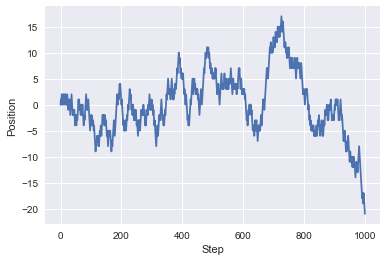

In [4]:
# Number of steps
n_steps = 1000

# Array to store walker positions
positions = np.zeros(n_steps)

# Initialize the walker's position
positions[0] = 0

for i in range(n_steps-1):
    
    # generate a random number
    p = np.random.rand()
    
    if p > 0.5:
        # make a right step
        positions[i+1] = positions[i] + 1
    else:
        # make a left step
        positions[i+1] = positions[i] - 1

# Show the trejectory
plt.plot(positions)
plt.xlabel('Step')
plt.ylabel('Position')
plt.show()

As we can see, the position of the walker with respect to the origin alternates over the course of the diffusion due to the randomness in the taken steps. We can also notice that the average displacement from the origin increases with greater number of steps.

Now let's generate multiple random trajectories and see their collective behavior. To do that, we will create a 2-dimensional `numpy` array where each row will be a different trajectory.

In [7]:
# Number of trajectories
n_traj = 1000

# 2d array for storing the trajectories
positions_2d = np.zeros([n_traj, n_steps])

# Initialize the position of all the walkers to 0
positions_2d[:,0] = 0

# Generate trajectories
for i in range(n_steps-1):
    for t in range(n_traj):
        p = np.random.rand()
        if p > 0.5:
            positions_2d[t,i+1] = positions_2d[t,i] + 1
        else:
            positions_2d[t,i+1] = positions_2d[t,i] - 1

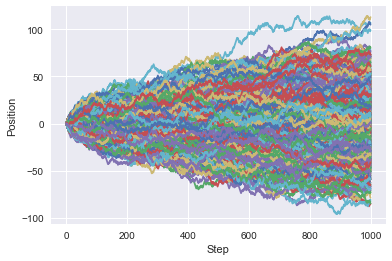

In [8]:
for t in range(n_traj):
    plt.plot(positions_2d[t,:])
plt.xlabel('Step')
plt.ylabel('Position')
plt.show()

The overall tendency is that the average discplament from the origin increases with the number of timesteps. Because each trajectory is assigned a solid color and all trajectories are overlayed on top of each other, it's hard to see the distribution of the walker position at given number of timesteps.

To get a better intuition about the distribution of the walker's position at different steps, we will assign the same color to each trajectory and add transparency to each of them so that the more densely populated regions have a darker color.

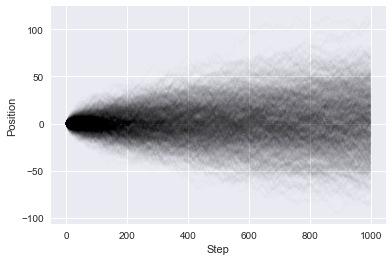

In [9]:
for t in range(n_traj):
    # alpha: transparency
    plt.plot(positions_2d[t,:], alpha = 0.01, color = 'black')
plt.xlabel('Step')
plt.ylabel('Position')
plt.show()

As we can see, over the course of diffusion the distribution of the walker's position becomes wider but remains centered around the origin, indicative of the unbiased nature of the random walk.

Now, let's make a histogram of the walker's final positions.

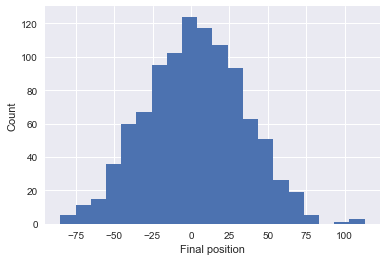

In [11]:
# Make a histogram of final positions
_ = plt.hist(positions_2d[:,n_steps-1], bins = 20)
plt.xlabel('Final position')
plt.ylabel('Count')

As expected, the distribution is centered around the origin and has a Gaussian-like shape. The more trajectories we sample, the "more Gaussian" the distribution will become.

From visual inspection we could tell that the walker tends to go further away from the origin as the number of steps increases. To get a more quantitative understanding of the relationship between the walker's position and the number of steps taken, let's plot the dependence of the variance of walker's position at different time steps.

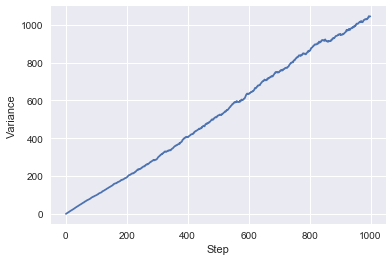

In [12]:
# For storing the variance
variance = np.zeros(n_steps)

# Calculate the variance
for i in range(n_steps):
    variance[i] = np.var(positions_2d[:,i])
    
# Plot the variance
plt.plot(variance)
plt.xlabel('Step')
plt.ylabel('Variance')
plt.show()

The variance clearly increases linearly with the number of steps. This means that, on average, it would take four time longer for the walkter to reach a twice farther distance from the origin.